# Levarage PubChem IDs for predicting the CHOP inhibitors. 

### Content   <a name="content"></a>

1. [Upload and analyse PubChem BioAssay AID 2732 on CHOP ](#1)
2. [Create a data frame with CIDs, SIDs and targets](#2)
3. [Upload and analyse PubChem BioAssay AID 1996 on water solubility ](#3)
4. [Create the final data frame, crossing the data frame that holds the targets with the water solubility data frame](#4)
5. [Ensure an equal number of classes in the test sets](#5)
6. [Scaling](#6)
7. [Balancing](#7)
8. [Machine Learning](#8)
9. [Cross validation](#9)
10. [Scrutinise for overfitting](#10)
11. [Hyperparameter tuning](#11)
12. [Final ML model](#12)
13. [Plot the learning curve ans AUC](#13)
14. [Confusion matrix, classification report](#14)

## Upload and analyse PubChem BioAssay AID 2732 on CHOP receptor <a name="1"></a>

In [1]:
import pandas as pd 

# load the BioAssay PubChem AID 2732 dataset
df_targets = pd.read_csv('3.CHOP_PubChem_AID_2732.csv', sep=';')

# To avoid truncation of some columns during data frame display
pd.set_option('display.max_columns', None) 

# Display the data frame
print('Shape of the data frame: ', df_targets.shape)
df_targets.head()

Shape of the data frame:  (219165, 10)


,PUBCHEM_RESULT_TAG,SID,CID,PUBCHEM_EXT_DATASOURCE_SMILES,target,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Pct Inhibition,Luminescence Value
0,1,17416326,2840784.0,CCCCC(=O)NC1=C(C2=C(S1)C(=C(CC2)C=O)Cl)C(=O)OCC,Active,100,NaN,NaN,116.56,35520
1,2,14741113,2010180.0,CC1=CC(=CC=C1)CS(=O)(=O)C2=NN=C(O2)[C@H](CC3=C...,Active,99,NaN,NaN,115.34,69880
2,3,14742004,3696529.0,CC1=CC=C(C=C1)C(=O)C2=C(OC3=C2C(=O)C(=O)C4=CC=...,Active,99,NaN,NaN,115.21,39160
3,4,863128,664366.0,CC[C@@H](C)[C@@H](C1=NN=C(O1)S(=O)(=O)CC2=C(C=...,Active,99,NaN,NaN,114.88,144040
4,5,17409458,6418635.0,C1=CC=C(C=C1)C2=NC(=C(N=N2)C(F)(F)F)SC3=CC=C(C...,Active,98,NaN,NaN,114.24,17400


In [2]:
df_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219165 entries, 0 to 219164
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   PUBCHEM_RESULT_TAG             219165 non-null  int64  
 1   SID                            219165 non-null  int64  
 2   CID                            219164 non-null  float64
 3   PUBCHEM_EXT_DATASOURCE_SMILES  219164 non-null  object 
 4   target                         219165 non-null  object 
 5   PUBCHEM_ACTIVITY_SCORE         219165 non-null  int64  
 6   PUBCHEM_ACTIVITY_URL           0 non-null       float64
 7   PUBCHEM_ASSAYDATA_COMMENT      0 non-null       float64
 8   Pct Inhibition                 219165 non-null  object 
 9   Luminescence Value             219165 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 16.7+ MB


In [3]:
# Remove duplicates 
df_targets.drop_duplicates()
df_targets.shape  # 353737 means no duplicates

(219165, 10)

In [4]:
# Remove compounds with missing CID-s
df_targets = df_targets[df_targets['CID'].notna()]
df_targets.shape

(219164, 10)

In [5]:
# Remove compounds with missing SID-s
df_targets = df_targets[df_targets['SID'].notna()]
df_targets.shape

(219164, 10)

In [6]:
import numpy as np
# Turn CID float data type into integer
df_targets['CID'] = df_targets['CID'].astype(np.int64) 
df_targets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219164 entries, 0 to 219164
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   PUBCHEM_RESULT_TAG             219164 non-null  int64  
 1   SID                            219164 non-null  int64  
 2   CID                            219164 non-null  int64  
 3   PUBCHEM_EXT_DATASOURCE_SMILES  219164 non-null  object 
 4   target                         219164 non-null  object 
 5   PUBCHEM_ACTIVITY_SCORE         219164 non-null  int64  
 6   PUBCHEM_ACTIVITY_URL           0 non-null       float64
 7   PUBCHEM_ASSAYDATA_COMMENT      0 non-null       float64
 8   Pct Inhibition                 219164 non-null  object 
 9   Luminescence Value             219164 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 18.4+ MB


In [7]:
# Analise the Active compounds
df_Active = df_targets[df_targets['target']=='Active']
df_Active.describe(include='all')

,PUBCHEM_RESULT_TAG,SID,CID,PUBCHEM_EXT_DATASOURCE_SMILES,target,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Pct Inhibition,Luminescence Value
count,8243.000000,8.243000e+03,8.243000e+03,8243,8243,8243.000000,0.0,0.0,8243,8.243000e+03
unique,NaN,NaN,NaN,8241,1,NaN,NaN,NaN,3483,NaN
top,NaN,NaN,NaN,CC1CCC(C(C1)OC(=O)CN2C3=CC=CC=C3[N+](=C2COC4=C...,Active,NaN,NaN,NaN,73.69,NaN
freq,NaN,NaN,NaN,2,8243,NaN,NaN,NaN,12,NaN
mean,4452.646003,1.581319e+07,1.126792e+07,NaN,NaN,75.302560,NaN,NaN,NaN,7.559046e+05
std,8809.378309,7.822437e+06,3.008770e+07,NaN,NaN,10.334771,NaN,NaN,NaN,5.169792e+05
min,1.000000,8.421370e+05,1.318000e+03,NaN,NaN,60.000000,NaN,NaN,NaN,7.480000e+03
25%,2061.500000,1.472127e+07,1.302210e+06,NaN,NaN,66.000000,NaN,NaN,NaN,3.115600e+05
50%,4122.000000,1.741040e+07,2.912244e+06,NaN,NaN,74.000000,NaN,NaN,NaN,6.944800e+05
75%,6182.500000,2.240874e+07,5.393924e+06,NaN,NaN,84.000000,NaN,NaN,NaN,1.134440e+06


In [8]:
# Amalise the Inactive compound
df_Inactive = df_targets[df_targets['target']=='Inactive']
df_Inactive.describe(include='all')

,PUBCHEM_RESULT_TAG,SID,CID,PUBCHEM_EXT_DATASOURCE_SMILES,target,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Pct Inhibition,Luminescence Value
count,210921.000000,2.109210e+05,2.109210e+05,210921,210921,210921.000000,0.0,0.0,210921,2.109210e+05
unique,NaN,NaN,NaN,210428,1,NaN,NaN,NaN,11216,NaN
top,NaN,NaN,NaN,COC1=C(C=C(C=C1)C2CC(=O)NC2)OC3CCCC3,Inactive,NaN,NaN,NaN,8.???,NaN
freq,NaN,NaN,NaN,4,210921,NaN,NaN,NaN,973,NaN
mean,113691.078333,1.652482e+07,8.292605e+06,NaN,NaN,8.553127,NaN,NaN,NaN,3.268193e+06
std,60887.927275,8.922944e+06,2.363522e+07,NaN,NaN,19.114349,NaN,NaN,NaN,1.372313e+06
min,8231.000000,8.421210e+05,7.200000e+01,NaN,NaN,-501.000000,NaN,NaN,NaN,1.086900e+05
25%,60961.000000,7.970464e+06,1.178186e+06,NaN,NaN,-3.000000,NaN,NaN,NaN,2.251280e+06
50%,113691.000000,1.750500e+07,2.892955e+06,NaN,NaN,7.000000,NaN,NaN,NaN,3.071000e+06
75%,166421.000000,2.480515e+07,5.069751e+06,NaN,NaN,19.000000,NaN,NaN,NaN,4.138920e+06


[<a href="#content">Back to top</a>]

## Create a data frame with CIDs, SIDs and targets <a name="2"></a>

In [9]:
# Create a data frame containing the classification targets
df_targets = df_targets [['CID', 'SID', 'target']]

# Display the data frame
print('Shape of df_targets : ', df_targets .shape)
df_targets .head()

Shape of df_targets :  (219164, 3)


,CID,SID,target
0,2840784,17416326,Active
1,2010180,14741113,Active
2,3696529,14742004,Active
3,664366,863128,Active
4,6418635,17409458,Active


In [10]:
# Check the classes in the bioassay
df_targets['target'].value_counts()

target
Inactive    210921
Active        8243
Name: count, dtype: int64

In [11]:
# Set the binary targets to "1" for an active antagonist and "0" for inactive 
df_targets = df_targets.copy()

# Create a dictionary
targets = {'Active' : 1,
           'Inactive' : 0}

# Replace the names with binary values set up in the dictionary targets
df_targets.target = [targets[item] for item in df_targets.target]

# Check how many unique values there are in the 'target' column
print('Unique values: ', df_targets['target'].unique())

# Count each of the binary targets
df_targets['target'].value_counts()

Unique values:  [1 0]


target
0    210921
1      8243
Name: count, dtype: int64

In [12]:
# Display the data frame
print('Shape of the df_targets: ', df_targets.shape)
df_targets.head()

Shape of the df_targets:  (219164, 3)


,CID,SID,target
0,2840784,17416326,1
1,2010180,14741113,1
2,3696529,14742004,1
3,664366,863128,1
4,6418635,17409458,1


In [13]:
# Creat a dataframe with full set of target 1 for latter use
df_targets_1 = df_targets[df_targets['target']==1]

[<a href="#content">Back to top</a>]

## Upload and analyse PubChem BioAssay AID 1996 on water solubility <a name="3"></a>

In [14]:
# Load data from PubChem BioAssay AID 1996 
df_solubility = pd.read_csv('0.Solubility_pubChem_AID_1996.csv')

# Display the data frame
print('Shape of df_solubility: ', df_solubility.shape)
df_solubility.head()

Shape of df_solubility:  (57859, 30)


,PUBCHEM_RESULT_TAG,SID,CID,PUBCHEM_EXT_DATASOURCE_SMILES,OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Solubility at pH 7.4_Qualifier_Mean,Solubility at pH 7.4_Mean,Test Concentration_1,Solubility at pH 7.4_Qualifier_1,Solubility at pH 7.4_1,Solubility at pH 7.4_Comment_1,Solubility of Astemizole at pH 7.4_Qualifier_1,Solubility of Astemizole at pH 7.4_1,Solubility of Sulfamethizole at pH 7.4_Qualifier_1,Solubility of Sulfamethizole at pH 7.4_1,Solubility of Imipramine HCl at pH 7.4_Qualifier_1,Solubility of Imipramine HCl at pH 7.4_1,Test Concentration_2,Solubility at pH 7.4_Qualifier_2,Solubility at pH 7.4_2,Solubility at pH 7.4_Comment_2,Solubility of Astemizole at pH 7.4_Qualifier_2,Solubility of Astemizole at pH 7.4_2,Solubility of Sulfamethizole at pH 7.4_Qualifier_2,Solubility of Sulfamethizole at pH 7.4_2,Solubility of Imipramine HCl at pH 7.4_Qualifier_2,Solubility of Imipramine HCl at pH 7.4_2
0,1,24826444,2374148,COC1=CC=C(C=C1)OCC2=NNC(=S)N2N,Active,40,NaN,NaN,=,10.85,200,<,0.1,Below LOQ,=,14.2,>,40.5,>,47.5,200.0,=,21.6,NaN,=,27.7,>,40.5,>,47.5
1,2,49669186,5295761,CC1=CC(=C(C=C1)NC2=NC3=CC=CC=C3N4C2=NN=C4)Cl,Inactive,0,NaN,NaN,<,0.10,200,<,0.1,Below LOQ,=,12.3,>,40.5,>,47.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,49669768,22431387,CC1=CC(=CC=C1)CCNC2=NC3=C(C=C(C=C3)C)N4C2=NN=C4,Inactive,0,NaN,NaN,<,0.10,200,<,0.1,Below LOQ,=,12.3,>,40.5,>,47.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,8139962,14296,CC1=C(N=C(C(=N1)C)C)C,Inactive,0,NaN,NaN,<,0.10,200,<,0.1,Below LOQ,=,11.4,>,40.5,>,47.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,24803435,865684,CC1=CC2=NC(=C(C=C2C=C1)C#N)NC3=CC=CC=C3OC,Inactive,0,NaN,NaN,<,0.20,200,<,0.2,Below LOQ,=,11.4,>,40.5,>,47.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_solubility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57859 entries, 0 to 57858
Data columns (total 30 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   PUBCHEM_RESULT_TAG                                  57859 non-null  int64  
 1   SID                                                 57859 non-null  int64  
 2   CID                                                 57859 non-null  int64  
 3   PUBCHEM_EXT_DATASOURCE_SMILES                       57859 non-null  object 
 4   OUTCOME                                             57859 non-null  object 
 5   PUBCHEM_ACTIVITY_SCORE                              57859 non-null  int64  
 6   PUBCHEM_ACTIVITY_URL                                0 non-null      float64
 7   PUBCHEM_ASSAYDATA_COMMENT                           0 non-null      float64
 8   Solubility at pH 7.4_Qualifier_Mean                 57859 non-null  object 


In [16]:
# Create the desired data frame with CID and SID for sifting 
df_solubility = df_solubility[['SID', 'CID']]

# Display the data frame
print('Shape of the data frame: ', df_solubility.shape)
df_solubility.head()

Shape of the data frame:  (57859, 2)


,SID,CID
0,24826444,2374148
1,49669186,5295761
2,49669768,22431387
3,8139962,14296
4,24803435,865684


[<a href="#content">Back to top</a>]

## Create the final data frame, crossing the data frame that holds the targets with the water solubility data frame  <a name="4"></a>

In [17]:
# Sift the main data frame with targets using the solubility data frame 
df = pd.merge(df_targets, df_solubility, on=["CID", "SID"])

# Display the data frame
print('Shape of the data frame: ', df.shape)
df.head()

Shape of the data frame:  (24480, 3)


,CID,SID,target
0,11957207,17401924,1
1,5663704,16952810,1
2,4673185,17504881,1
3,1807333,17388550,1
4,3319616,22414792,1


In [18]:
# Count values of the sifted data frame 
df['target'].value_counts()

target
0    24188
1      292
Name: count, dtype: int64

In [19]:
# Create a data frame with target 0
df_0 = df[df['target']==0]

# Concatenate the sifted target 0 with the original target 1
df = pd.concat([df_0, df_targets_1])

# Display the data frame
print('Shape of the data frame: ', df.shape)
df.head()

Shape of the data frame:  (32431, 3)


,CID,SID,target
292,2812961,26731633,0
293,2209576,24788363,0
294,2811845,26728765,0
295,3624322,24838072,0
296,2414029,24825712,0


In [20]:
# Count the target
df['target'].value_counts()

target
0    24188
1     8243
Name: count, dtype: int64

In [21]:
# Shuffle the resulting data set
df = df.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

- 24 188 samples (see bellow) + 8 243 samples (see above) = 32 431 samples of the final dataset
- Ensure equal number of taget 1 and 0 by extracting:
-                                       ~ 10% of target 1 (3 243  samples)
-                                       +
-                                       ~ 10% of target 0 (3 243 samples)
-                                       =
-                                       20% for the test sets

[<a href="#content">Back to top</a>]

## Ensure an equal number of classes in the test sets <a name="5"></a>

In [22]:
# Handle the part of target 1 in the test set 
df_1 = df[df['target']==1]

# Shuffle the resulting data set
df_1 = df_1.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

# Extract 3243 samples for the test set
df_1_test = df_1.iloc[:3243]

# Assign the rest of target 1 for the train set
df_1_train = df_1.iloc[3243:]

In [23]:
# Handle the part of target 0 in the test set 
df_0 = df[df['target']==0]

# Shuffle the resulting data set
df_0 = df_0.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

# Extract 3243 samples for the test set
df_0_test = df_0.iloc[:3243]

# Assign the rest of target 1 for the train set
df_0_train = df_0.iloc[3243:]

In [24]:
# Create train and test dataframe for further manipulation 
train = pd.concat([df_0_train, df_1_train])
test = pd.concat([df_0_test, df_1_test])

In [25]:
# Create the sets for ML 
X_train = train.drop(columns='target', axis=1)
y_train = train['target']
X_test =  test.drop(columns='target', axis=1)
y_test = test['target']

In [26]:
# Create the sets for Cross-validation
X = pd.concat([X_train, X_test])
y = pd.concat([y_train,y_test])

In [27]:
# Check the number of classes in the y_test set
y_test.value_counts()

target
0    3243
1    3243
Name: count, dtype: int64

[<a href="#content">Back to top</a>]

## Scaling <a name="6"></a>

In [28]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# # Standardise the data points
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (25945, 2)
X_test:   (6486, 2)
y_train:  (25945,)
y_test:   (6486,)


[<a href="#content">Back to top</a>]

## Balancing <a name="7"></a>

[(0, 20945), (1, 5000)]


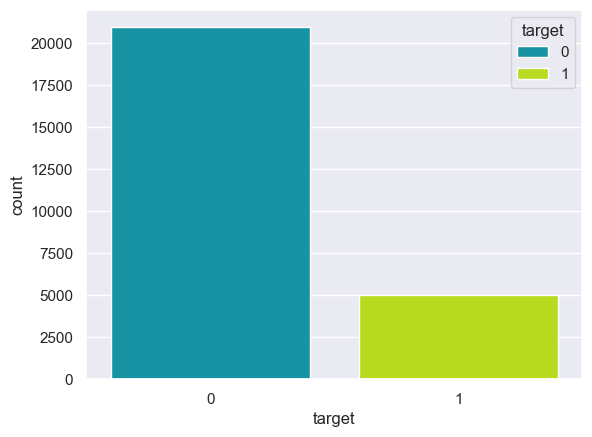

In [29]:
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns

# Plot the imbalance between the targets 
print(sorted(Counter(y_train).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y_train, hue=y_train, palette='nipy_spectral')
plt.show()

[(0, 20945), (1, 20945)]


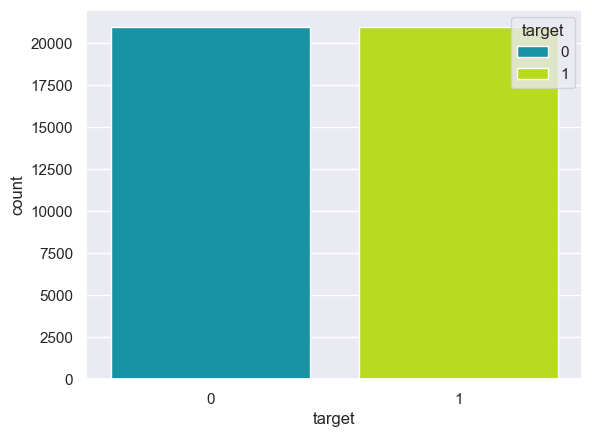

In [30]:
from imblearn.over_sampling import RandomOverSampler

# Balance targets with Randome Over Sampler
ros = RandomOverSampler()

X_train, y_train = ros.fit_resample(X_train, y_train)

# Plot the balance between classification targets 
print(sorted(Counter(y_train).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y_train, hue=y_train,palette='nipy_spectral')
plt.show()

In [31]:
# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (41890, 2)
X_test:   (6486, 2)
y_train:  (41890,)
y_test:   (6486,)


[<a href="#content">Back to top</a>]

## Machine Learning <a name="8"></a>

In [32]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the algorithms that will be used, placing them in a dictionary 
clfs = {"SVM":SVC(kernel='rbf', C=1, probability=True),
        "Decision":DecisionTreeClassifier(), 
        "RandomForest":RandomForestClassifier(), 
        "GradientBoost":GradientBoostingClassifier(),
        "XGBoost":XGBClassifier(verbosity=0),
       "K-nearest": KNeighborsClassifier(n_neighbors=3)
       }

In [33]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

# Create statistics with the results of training with different algorithms
def model_fit(clfs):
    fitted_model={}
    model_result = pd.DataFrame()
    # Iterate the clfs dictionary clfs
    for model_name, model in clfs.items():
        # Train the current model
        model.fit(X_train,y_train)
        # Add the current model name
        fitted_model.update({model_name:model})
        # Prediction of the current model 
        y_pred = model.predict(X_test)
        model_dict = {}
        model_dict['1.Algorithm'] = model_name
        # Calculate the metrics
        model_dict['2.Accuracy'] = round(accuracy_score(y_test, y_pred),3)
        model_dict['3.Precision'] = round(precision_score(y_test, y_pred),3)
        model_dict['4.Recall'] = round(recall_score(y_test, y_pred),3)
        model_dict['5.F1'] = round(f1_score(y_test, y_pred),3)
        model_dict['6.ROC'] = round(roc_auc_score(y_test, y_pred),3)
        model_result = model_result._append(model_dict,ignore_index=True)
    return fitted_model, model_result

# Run the function model_fit(clfs) 
fitted_model, model_result = model_fit(clfs)

# Display the results of the model_fit(clfs) function in a descending order
model_result.sort_values(by=['2.Accuracy'],ascending=False)

,1.Algorithm,2.Accuracy,3.Precision,4.Recall,5.F1,6.ROC
3,GradientBoost,0.899,0.984,0.812,0.890,0.899
4,XGBoost,0.896,0.960,0.827,0.888,0.896
2,RandomForest,0.893,0.966,0.814,0.884,0.893
0,SVM,0.884,0.981,0.784,0.871,0.884
1,Decision,0.878,0.950,0.798,0.867,0.878
5,K-nearest,0.877,0.912,0.836,0.872,0.877


[<a href="#content">Back to top</a>]

## Cross-validation  <a name="9"></a>

In [34]:
# Cross validation
from sklearn.model_selection import cross_val_score
import numpy as np

# Create statistics with the results of the cross-validation of different estimators
def model_CV(clfs):
    estimated_model={}
    model_cv_result = pd.DataFrame()
    for model_name, model in clfs.items():
        estimated_model.update({model_name:model})
        scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        model_dict = {}
        model_dict['1.Algorithm'] = model_name
        model_dict['2.Mean CV Score'] = round(scores.mean(), 4)
        model_dict['3.Standard Deviation'] = round(scores.std(), 4)
        model_dict['4.List of CV Scores'] = np.round(scores, 4)
        model_cv_result = model_cv_result._append(model_dict,ignore_index=True)
    return estimated_model, model_cv_result

# Run the model_CV(clsf) function
estimated_model, model_cv_result = model_CV(clfs)

# Display the results of cross_validation statistics in a descending order
model_cv_result.sort_values(by=['2.Mean CV Score'],ascending=False)

,1.Algorithm,2.Mean CV Score,3.Standard Deviation,4.List of CV Scores
3,GradientBoost,0.9414,0.0005,"[0.9414, 0.9419, 0.9419, 0.9414, 0.9406]"
4,XGBoost,0.9407,0.0012,"[0.9402, 0.943, 0.9394, 0.9402, 0.9406]"
2,RandomForest,0.9361,0.0018,"[0.9373, 0.9386, 0.9332, 0.9354, 0.9359]"
5,K-nearest,0.9315,0.0013,"[0.9319, 0.9305, 0.9295, 0.9332, 0.9322]"
0,SVM,0.9095,0.0015,"[0.9112, 0.9076, 0.9104, 0.9106, 0.9078]"
1,Decision,0.9068,0.0031,"[0.9072, 0.9107, 0.9041, 0.9024, 0.9093]"


[<a href="#content">Back to top</a>]

## Scrutinise for overfitting  <a name="10"></a>

In [35]:
import matplotlib.pyplot as plt

# Evaluate GradientBoostingClassifier performance on train and test sets with different tree depths
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model_ = GradientBoostingClassifier(max_depth=i)
 # fit model_ on the training dataset
 model_.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model_.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model_.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.893, test: 0.891
>2, train: 0.895, test: 0.892
>3, train: 0.902, test: 0.899
>4, train: 0.907, test: 0.899
>5, train: 0.916, test: 0.901
>6, train: 0.925, test: 0.900
>7, train: 0.937, test: 0.900
>8, train: 0.947, test: 0.898
>9, train: 0.960, test: 0.895
>10, train: 0.971, test: 0.892
>11, train: 0.978, test: 0.895
>12, train: 0.989, test: 0.896
>13, train: 0.992, test: 0.895
>14, train: 0.997, test: 0.895
>15, train: 0.999, test: 0.894
>16, train: 1.000, test: 0.894
>17, train: 1.000, test: 0.894
>18, train: 1.000, test: 0.893
>19, train: 1.000, test: 0.893
>20, train: 1.000, test: 0.891


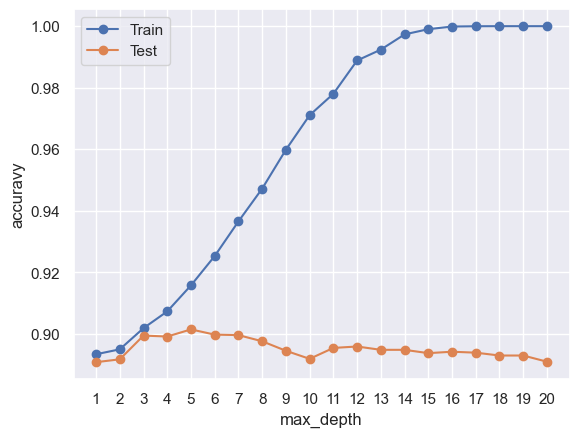

In [36]:
import math
import matplotlib.pyplot as plt

# Set integers for x axis
new_x_ticks = range(math.floor(min(values)), math.ceil(max(values))+1)
plt.xticks(new_x_ticks)
# Plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("accuravy")
plt.show()

[<a href="#content">Back to top</a>]

## Hyperparameter tuning  <a name="11"></a>

In [37]:
from sklearn.model_selection import GridSearchCV

# Define the model
gb_model = GradientBoostingClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=gb_model, 
                          param_grid=param_grid, 
                          cv=5,  # 5-fold cross-validation
                          scoring='accuracy', 
                          verbose=2) 

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train) 

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) 
print(f"Best Accuracy: {accuracy}")
print(f"Best Hyperparameters: {best_params}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; 

In [38]:
# Evaluate GradientBoostingClassifier performance on train and test sets with different tree depths
train_scores, test_scores = lst(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model_ = GradientBoostingClassifier(max_depth=i,
                                min_samples_leaf=1,
                                learning_rate=0.21138017771625536,
                                min_samples_split=4,
                                n_estimators=186)
 # fit model_ on the training dataset
 model_.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model_.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model_.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.894, test: 0.891
>2, train: 0.907, test: 0.899
>3, train: 0.921, test: 0.901
>4, train: 0.939, test: 0.898
>5, train: 0.958, test: 0.900
>6, train: 0.975, test: 0.895
>7, train: 0.990, test: 0.892
>8, train: 0.994, test: 0.891
>9, train: 0.998, test: 0.890
>10, train: 1.000, test: 0.890
>11, train: 1.000, test: 0.892
>12, train: 1.000, test: 0.894
>13, train: 1.000, test: 0.893
>14, train: 1.000, test: 0.894
>15, train: 1.000, test: 0.896
>16, train: 1.000, test: 0.894
>17, train: 1.000, test: 0.893
>18, train: 1.000, test: 0.893
>19, train: 1.000, test: 0.892
>20, train: 1.000, test: 0.892


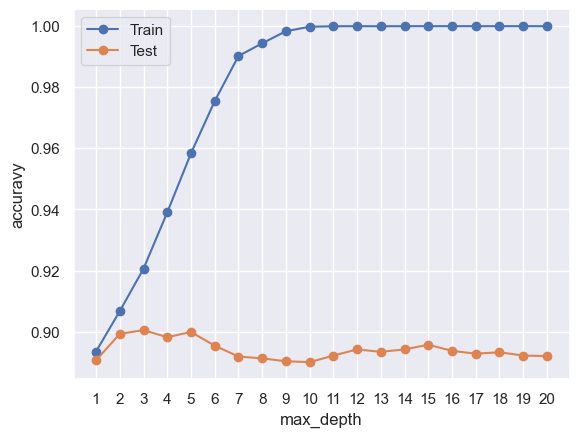

In [39]:
# Set integers for x axis
new_x_ticks = range(math.floor(min(values)), math.ceil(max(values))+1)
plt.xticks(new_x_ticks)
# Plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("accuravy")
plt.show()

In [43]:
# ML withthe suggested hyperparameters
model=GradientBoostingClassifier(max_depth=3,
                                min_samples_leaf=1,
                                learning_rate=0.2,
                                min_samples_split=2,
                                n_estimators=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
acc = round(accuracy_score(y_test, y_pred),3)
print('Accuracy: ', acc)
pre = round(precision_score(y_test, y_pred),3)
print('Precision: ', pre) 
rec = round(recall_score(y_test, y_pred),3)
print('Recall: ',rec) 
f1 = round(f1_score(y_test, y_pred),3)
print('F1: ', f1) 
roc = round(roc_auc_score(y_test, y_pred),3) 
print('ROC: ', roc)

Accuracy:  0.899
Precision:  0.979
Recall:  0.817
F1:  0.89
ROC:  0.899


In [44]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", np.round(scores, 3))
print("Mean cross-validation score:", np.round(scores.mean(), 3))

Cross-validation scores: [0.941 0.942 0.94  0.939 0.94 ]
Mean cross-validation score: 0.94


In [45]:
import optuna

def objective(trial):
    """
    Objective function for Optuna hyperparameter tuning.

    Args:
        trial: An Optuna trial object.

    Returns:
        The negative accuracy score (to be minimized).
    """
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200), 
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True), 
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10)
    }

    model = GradientBoostingClassifier(**params, random_state=42) 
    accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return -accuracy  # Optuna minimizes the objective function

# Create a study object
study = optuna.create_study(direction='minimize')

# Run the optimization
study.optimize(objective, n_trials=100)  # Adjust n_trials as needed

# Get the best hyperparameters
best_params = study.best_params

# Train the model with the best hyperparameters
best_model = GradientBoostingClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) 
print(f"Best Accuracy: {accuracy}")
print(f"Best Hyperparameters: {best_params}")

C:\Users\ivano\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-12-27 20:53:36,136] A new study created in memory with name: no-name-0dfee9e9-63d5-4544-9642-64a07270de1f
[I 2024-12-27 20:53:46,551] Trial 0 finished with value: -0.8972547147290524 and parameters: {'n_estimators': 53, 'learning_rate': 0.01141317919051891, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 8}. Best is trial 0 with value: -0.8972547147290524.
[I 2024-12-27 20:54:41,334] Trial 1 finished with value: -0.9085939365003581 and parameters: {'n_estimators': 173, 'learning_rate': 0.01643124331932666, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 4}. Best is trial 1 with value: -0.9085939365003581.
[I 2024-12-27 20:55:02,038] Trial 2 finished with value: -0.902363332537598

Best Accuracy: 0.8889916743755781
Best Hyperparameters: {'n_estimators': 179, 'learning_rate': 0.2463083429915664, 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 1}


In [46]:
# Evaluate GradientBoostingClassifier performance on train and test sets with different tree depths
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model_ = GradientBoostingClassifier(max_depth=i,
                                     min_samples_leaf=1,
                                     learning_rate=0.2463083429915664,
                                     min_samples_split=11,
                                     n_estimators=179)
 # fit model_ on the training dataset
 model_.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model_.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model_.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.894, test: 0.891
>2, train: 0.908, test: 0.899
>3, train: 0.925, test: 0.898
>4, train: 0.943, test: 0.898
>5, train: 0.963, test: 0.896
>6, train: 0.979, test: 0.892
>7, train: 0.991, test: 0.893
>8, train: 0.996, test: 0.891
>9, train: 0.999, test: 0.889
>10, train: 0.999, test: 0.888
>11, train: 1.000, test: 0.894
>12, train: 1.000, test: 0.892
>13, train: 1.000, test: 0.893
>14, train: 1.000, test: 0.893
>15, train: 1.000, test: 0.894
>16, train: 1.000, test: 0.894
>17, train: 1.000, test: 0.893
>18, train: 1.000, test: 0.893
>19, train: 1.000, test: 0.894
>20, train: 1.000, test: 0.893


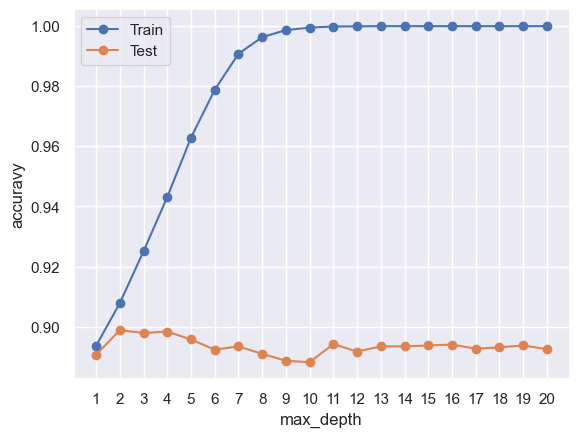

In [47]:
# Set integers for x axis
new_x_ticks = range(math.floor(min(values)), math.ceil(max(values))+1)
plt.xticks(new_x_ticks)
# Plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("accuravy")
plt.show()

In [51]:
# ML withthe suggested hyperparameters
model = GradientBoostingClassifier(max_depth=i,
                                   min_samples_leaf=1,
                                   learning_rate=0.2463083429915664,
                                   min_samples_split=11,
                                   n_estimators=179)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
acc = round(accuracy_score(y_test, y_pred),3)
print('Accuracy: ', acc)
pre = round(precision_score(y_test, y_pred),3)
print('Precision: ', pre) 
rec = round(recall_score(y_test, y_pred),3)
print('Recall: ',rec) 
f1 = round(f1_score(y_test, y_pred),3)
print('F1: ', f1) 
roc = round(roc_auc_score(y_test, y_pred),3) 
print('ROC: ', roc)

Accuracy:  0.893
Precision:  0.973
Recall:  0.808
F1:  0.883
ROC:  0.893


In [52]:
# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", np.round(scores, 3))
print("Mean cross-validation score:", np.round(scores.mean(), 3))

Cross-validation scores: [0.933 0.936 0.93  0.93  0.932]
Mean cross-validation score: 0.932


[<a href="#content">Back to top</a>]

## Final ML model  <a name="12"></a>

In [53]:
# The final model 
model= GradientBoostingClassifier(max_depth=5)

# ML 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
acc = round(accuracy_score(y_test, y_pred),3)
print('Accuracy: ', acc)
pre = round(precision_score(y_test, y_pred),3)
print('Precision: ', pre) 
rec = round(recall_score(y_test, y_pred),3)
print('Recall: ',rec) 
f1 = round(f1_score(y_test, y_pred),3)
print('F1: ', f1) 
roc = round(roc_auc_score(y_test, y_pred),3) 
print('ROC: ', roc)

Accuracy:  0.901
Precision:  0.983
Recall:  0.817
F1:  0.892
ROC:  0.901


In [54]:
# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", np.round(scores, 3))
print("Mean cross-validation score:", np.round(scores.mean(), 3))

Cross-validation scores: [0.943 0.944 0.942 0.943 0.942]
Mean cross-validation score: 0.943


[<a href="#content">Back to top</a>]

## Plot the learning curve and AUC <a name="13"></a> 

C:\Users\ivano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ivano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ivano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ivano\AppDat

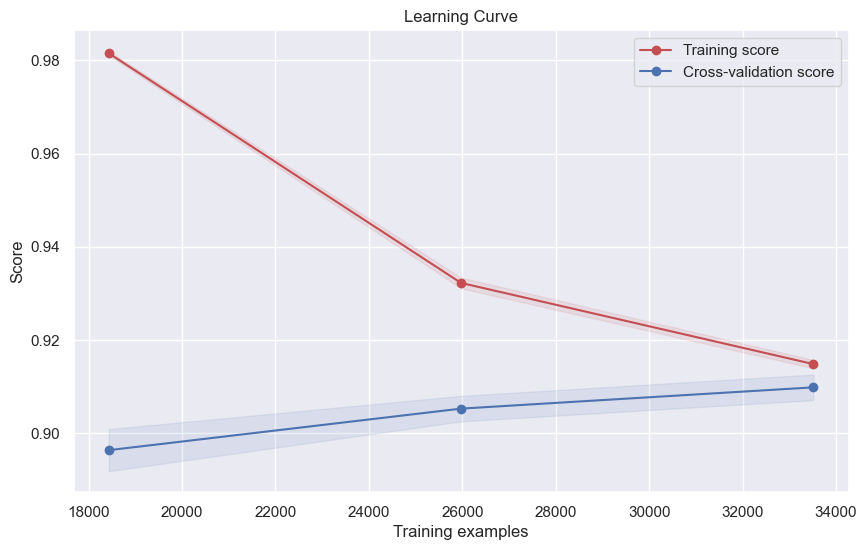

In [55]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="b",
)
plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, "o-", color="b", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

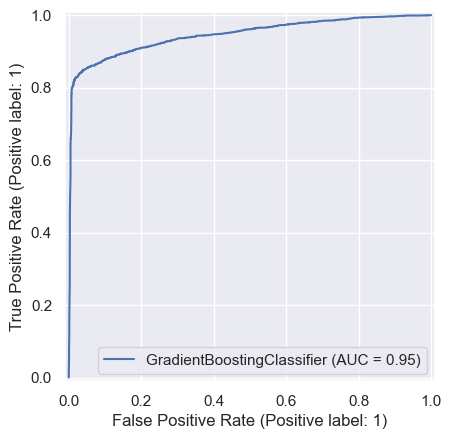

In [56]:
from sklearn.metrics import RocCurveDisplay

svc_disp = RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

[<a href="#content">Back to top</a>]

## Confusion matrix, classification report <a name="14"></a>

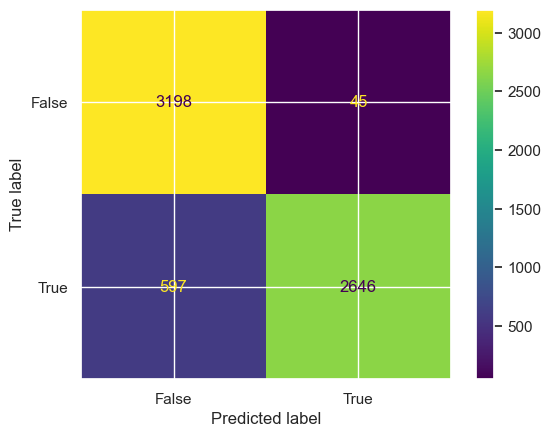

In [57]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Random forest classifier prediction
predicted = model.fit(X_train, y_train).predict(X_test)

# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# Display confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [58]:
# Classification report 
from sklearn.metrics import classification_report

# Print the classification report 
target_names = ['Active (target 1) ', 'Inactive (target 0)']
print(classification_report(y_test, predicted, target_names=target_names))

                     precision    recall  f1-score   support

 Active (target 1)        0.84      0.99      0.91      3243
Inactive (target 0)       0.98      0.82      0.89      3243

           accuracy                           0.90      6486
          macro avg       0.91      0.90      0.90      6486
       weighted avg       0.91      0.90      0.90      6486



[<a href="#content">Back to top</a>]